# **1. Perkenalan Dataset**

Dataset yang digunakan adalah dataset diabetes. Dataset ini merupakan dataset publik yang bisa diakses di link berikut : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset


### Deskripsi Variabel

Variabel | Keterangan
----------|----------
gender| jenis kelamin
age |  umur dalam decimal
hypertension| 0: tidak hipertensi, 1: hipertensi
heart_disease| 0: tidak ada penyakit jantung, 1: penyakit jantung
smoking_history|6 kategori: not current (tidak merokok saat ini), former (mantan perokok), No Info (tidak ada informasi), current (merokok saat ini), never (tidak pernah merokok), dan ever (pernah merokok).
bmi | ukuran lemak tubuh berdasarkan berat dan tinggi. Rentang BMI dalam dataset adalah 10,16 hingga 71,55.
HbA1c_level| ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir.
blood_glucose_level | Jumlah glukosa dalam aliran darah pada waktu tertentu.
diabetes | 0: tidak diabetes, 1: diabetes




# 2. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [1]:

import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score
#from imblearn.over_sampling import SMOTE





# **3. Memuat Dataset**

tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

In [2]:
#membaca csv dalam folder
data = pd.read_csv("../diabetes_prediction_dataset_raw.csv",sep=",")

# Display the first few rows
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Terdapat 2 variabel bertipe object, 3 variabel bertipe float64 dan 4 variabel bertipe int64

In [4]:
data['age'] = np.where(data['age'] < 1, np.ceil(data['age']), data['age'].round()).astype(int)

Data age diubah dari desimal menjadi integer dengan umur yang dibawah 1 tahun dianggap 1 tahun agar tidak ada yang memiliki umur 0. Hal ini dapat mempermudah analisis kedepannya

In [5]:
data.shape

(100000, 9)

Dari code diatas didapat :

| Jumlah Baris | Jumlah Kolom |
--------|-------
| 100000 | 9 |

In [6]:
df = pd.DataFrame(data)

### Deskripsi Statistik dari Data

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.889990,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.509318,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,1.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count : Jumlah sampel pada data.
- Mean : Nilai rata-rata.
- Std : Standar deviasi.
- Min : nilai minimum setiap kolom.
- 25% : Kuartil pertama adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% : Kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% : Kuartil ketiga.
- Max : Nilai maksimum.

Dari informasi diatas, disimpulkan bahwa data ini mencakup orang yang berumur 1-80 tahun dengan BMI rentang 10-95. Kadar gula di aliran darah 2-3 bulan terakhir (HbA1c_level) responden berada di kisaran 3.5 hingga 9 persen, sedangkan kadar gula di aliran saat data ini diambil berada pada kisaran 80 hingga 300 mg/dL

# **4. Exploratory Data Analysis (EDA)**

### Univariate Analysis

In [8]:
fitur_numerik=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fitur_kategorikal=['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

In [9]:
count = df[fitur_kategorikal].value_counts()

jumlah_unik =df[fitur_kategorikal].nunique()
nilai_unik = df[fitur_kategorikal].apply(lambda col: col.unique())
pd.DataFrame({
    'Jumlah Unik': jumlah_unik,
    'Nilai Unik': nilai_unik
})

,Jumlah Unik,Nilai Unik
gender,3,"[Female, Male, Other]"
smoking_history,6,"[never, No Info, current, former, ever, not cu..."
hypertension,2,"[0, 1]"
heart_disease,2,"[1, 0]"
diabetes,2,"[0, 1]"


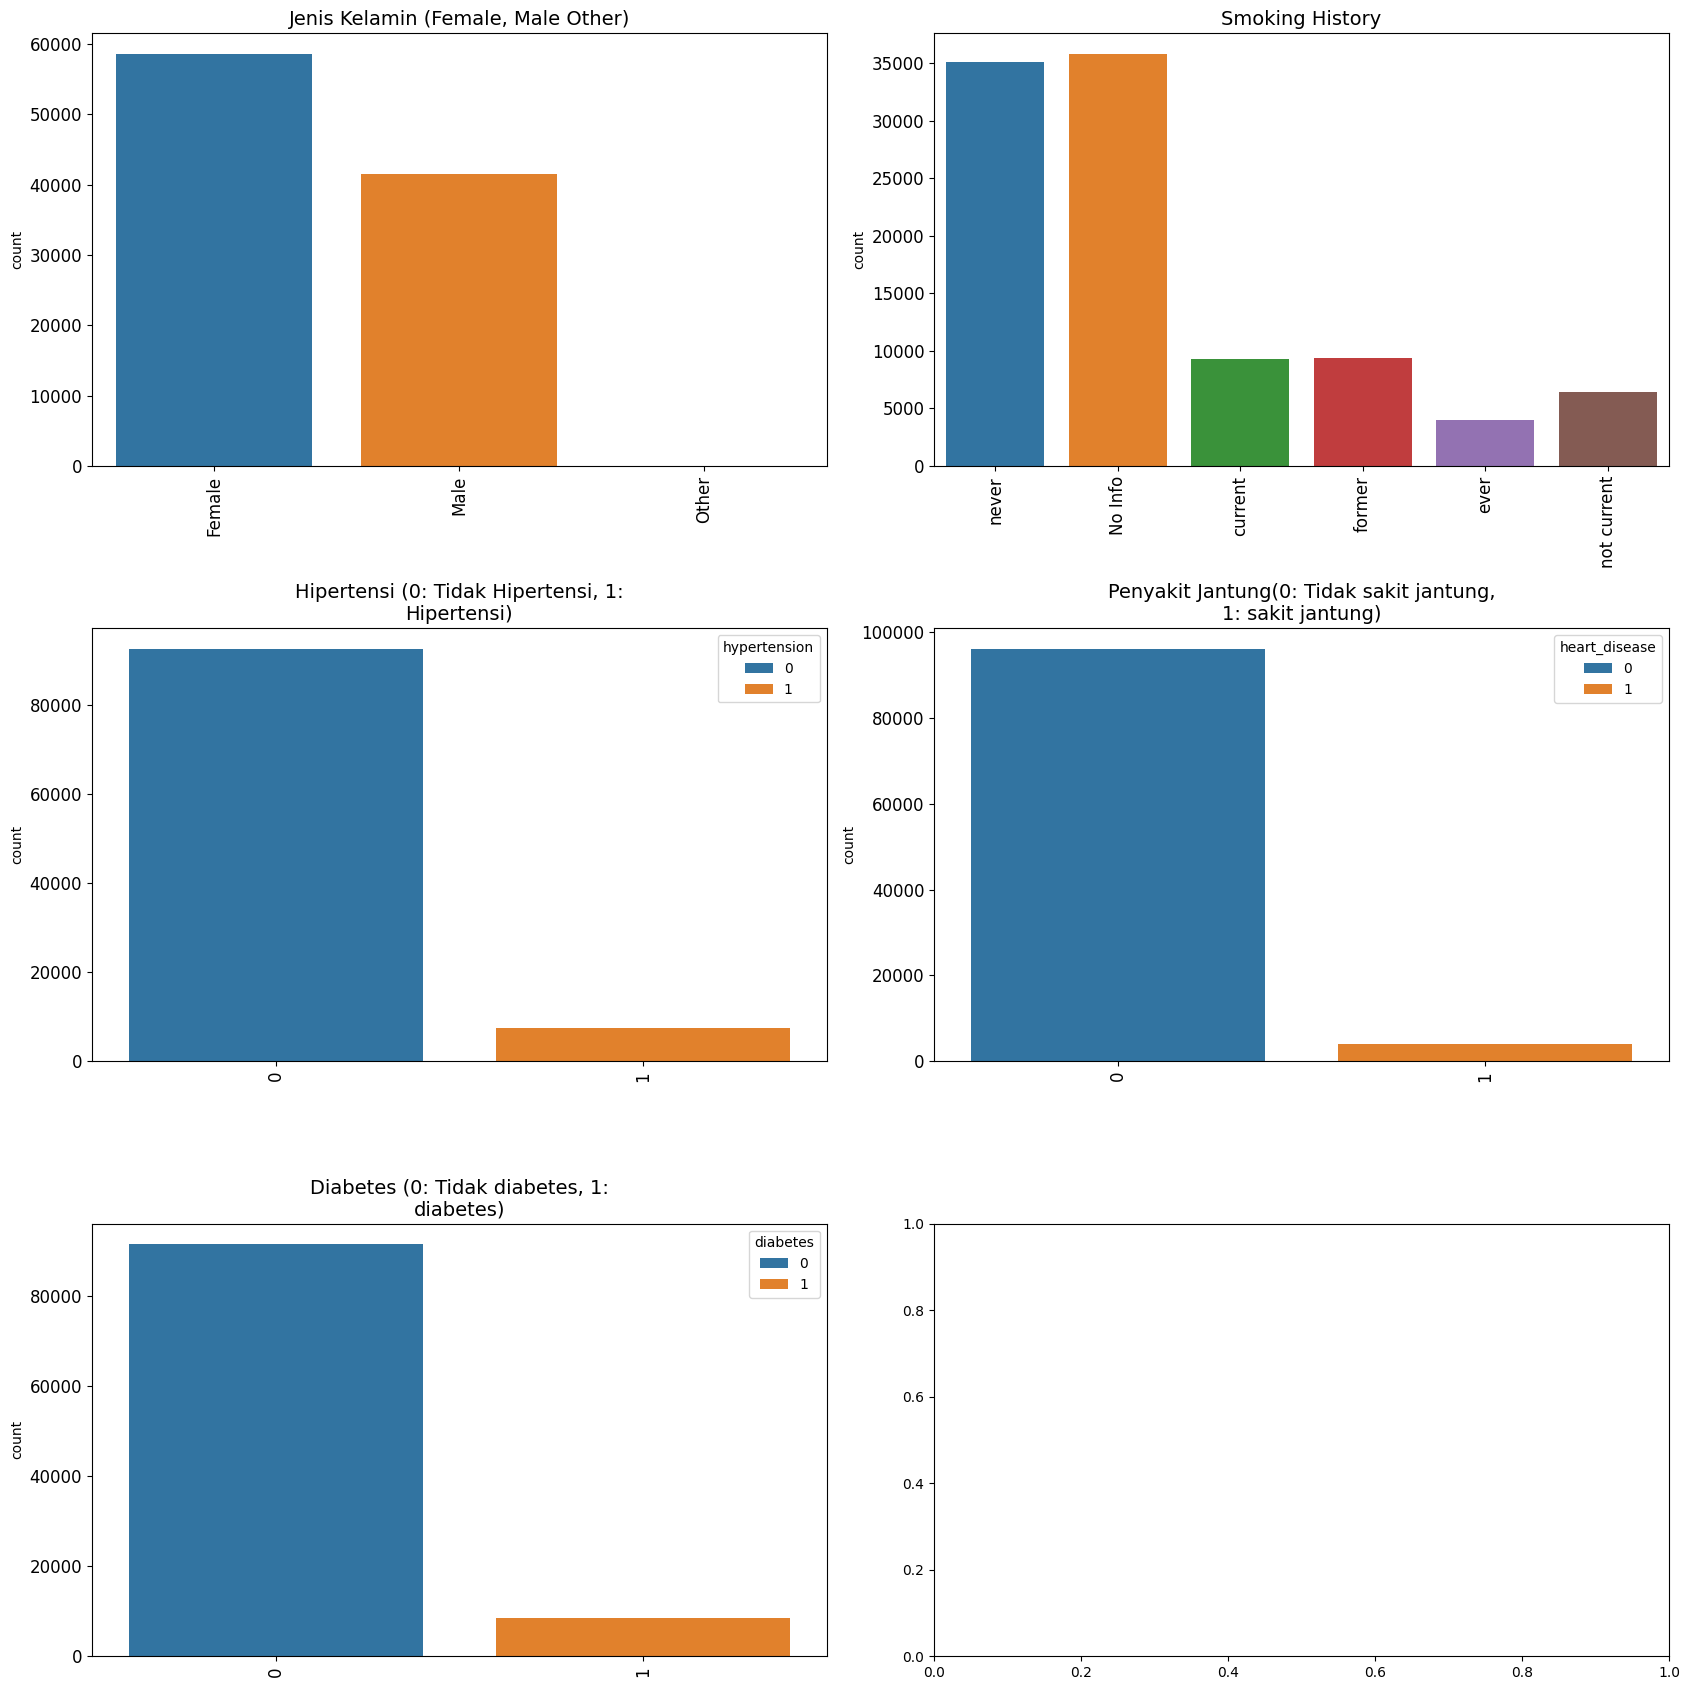

In [10]:
# Membentuk plot dengan subplot sejumlah 6 berukuran 3 x 2
fig, axes = plt.subplots(3, 2, figsize = (17, 17))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Mendeskripsikan kolom-kolom kategorikal yang akan digunakan
deskripsi_kolom_kategorikal = ["Jenis Kelamin (Female, Male Other)",
                                "Smoking History",
                                "Hipertensi (0: Tidak Hipertensi, 1: Hipertensi)",
                                "Penyakit Jantung(0: Tidak sakit jantung, 1: sakit jantung)",
                                "Diabetes (0: Tidak diabetes, 1: diabetes)"
]

# Membentuk plot jumlah dalam bentuk bar plot untuk masing-masing kolom
for i, kolom in enumerate(df[fitur_kategorikal].columns):
    sns.countplot(x = kolom, data = data, ax = axes[i], hue = kolom)

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"{deskripsi_kolom_kategorikal[i]}", width = 40))
    axes[i].set_title(judul)
    axes[i].title.set_size(14)

    # Mengatur label x
    axes[i].tick_params(axis = "x", labelrotation = 90)
    axes[i].tick_params(axis = "both", which = "major", labelsize = 12)
    axes[i].set_xlabel("")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari plot-plot diatas didapat informasi:
  1. Dari Plot Gender, responden mayoritas perempuan. Juga terdapat sangat sedikit yang menolak menjawab yaitu other
  2. Dari plot Smoking History, mayoritas responden tidak pernah merokok dan no info.
  3. Dari plot Hipertensi, mayoritas tidak hipertensi
  4. Dari plot Penyakit Jantung, mayoritas tidak sakit jantung
  5. Dari plot Diabetes, mayoritas tidak diabetes

  Beberapa kelas sangat imbalance, nantinya akan dilakukan oversampling sebelum training
  Untuk kedepannya gender "Other" akan di drop karena hanya berjumlah sangat sedikit.

In [11]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

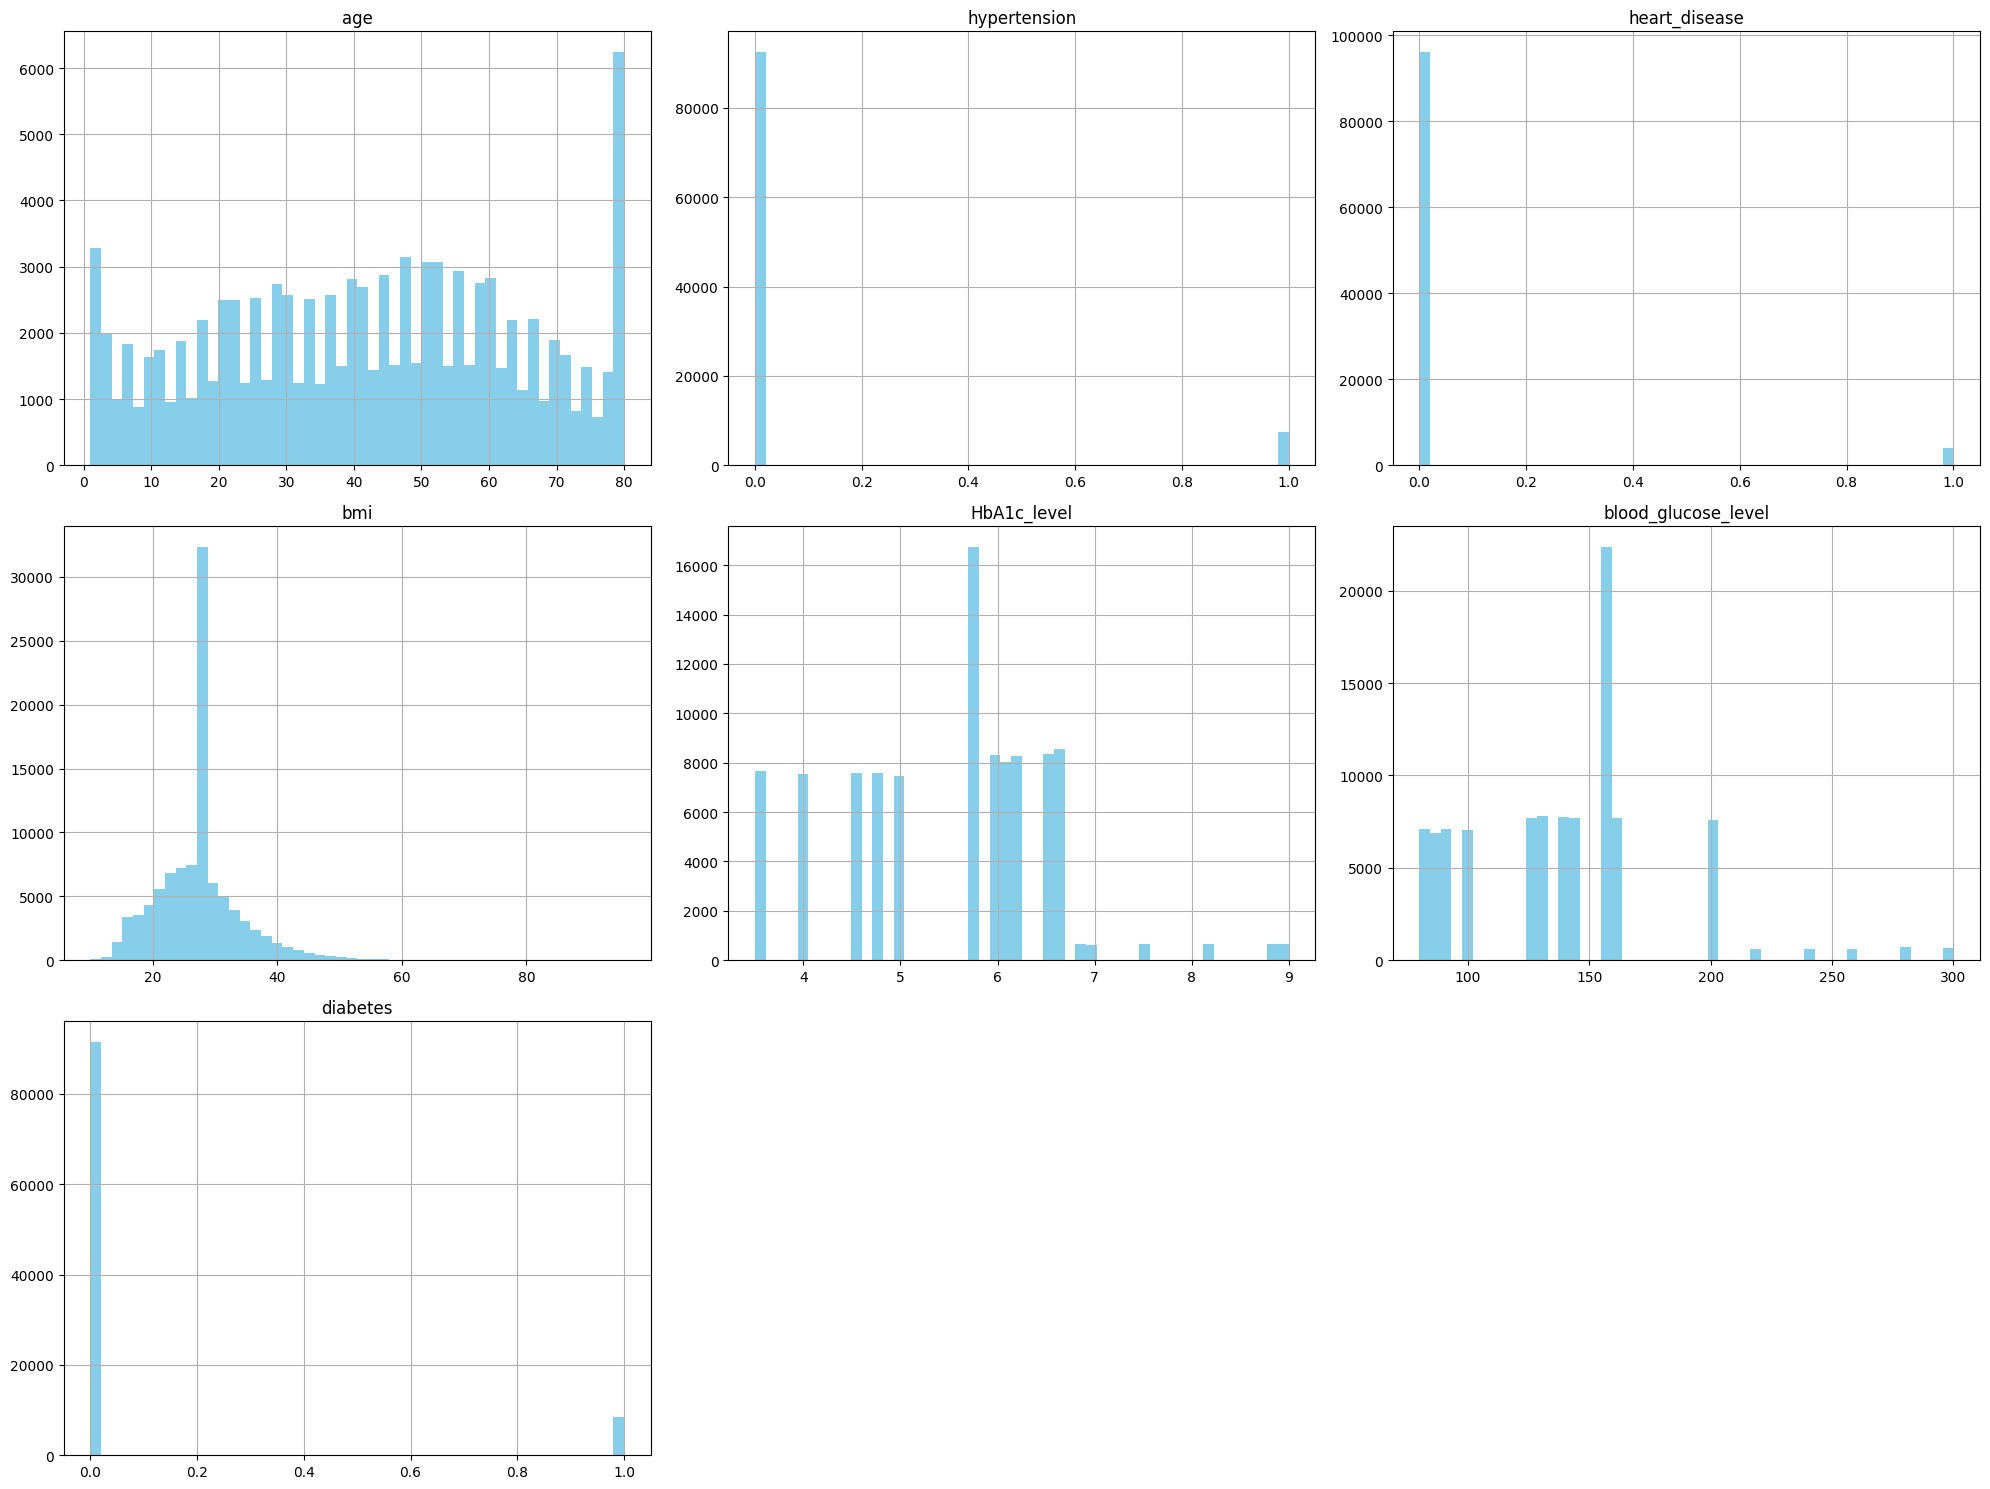

In [12]:
df.hist(bins=50, figsize=(20,15), color= 'skyblue')

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

#menampilkan plot
plt.show()

In [13]:
skewness = df.skew(numeric_only=True)

summary = pd.DataFrame({
    'Skewness': skewness,
    'Kategori': skewness.apply(lambda x:
        'Miring Kiri' if x < -0.5 else
        'Miring Kanan' if x > 0.5 else
        'Cukup Normal')
})

print(summary)


                     Skewness      Kategori
age                 -0.050757  Cukup Normal
hypertension         3.231296  Miring Kanan
heart_disease        4.733872  Miring Kanan
bmi                  1.043836  Miring Kanan
HbA1c_level         -0.066854  Cukup Normal
blood_glucose_level  0.821655  Miring Kanan
diabetes             2.976217  Miring Kanan


Dari Gambar maupun output diatas didapat informasi:
1. Plot Histogram dari **HbA1c_level** dan **Age* berdistribusi cukup normal
2. Plot Histogram dari **Hypertension**, **heart_disease**, **bmi**, **blood_glucose_level** dan **diabetes** berdistribusi miring ke kanan (right skewed)

Outliers

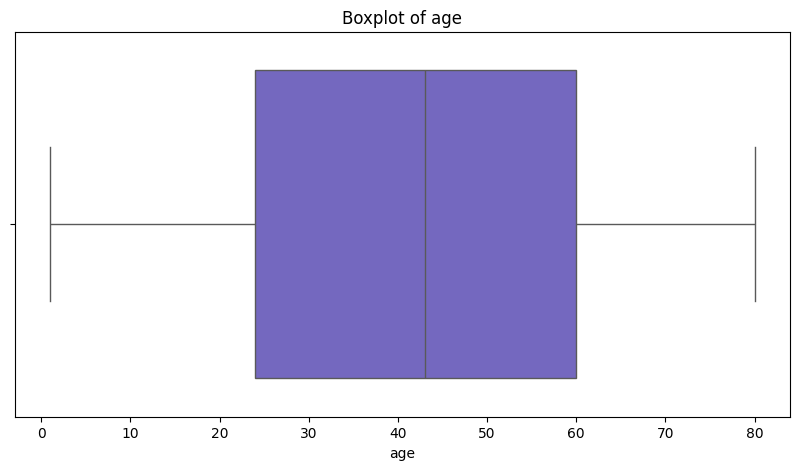

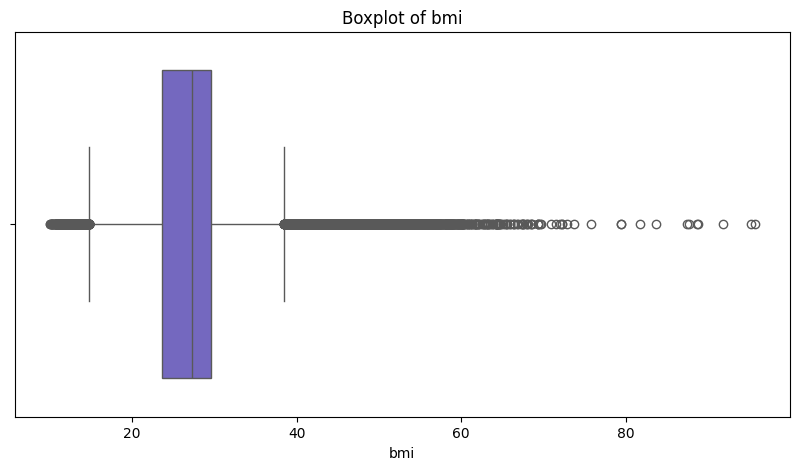

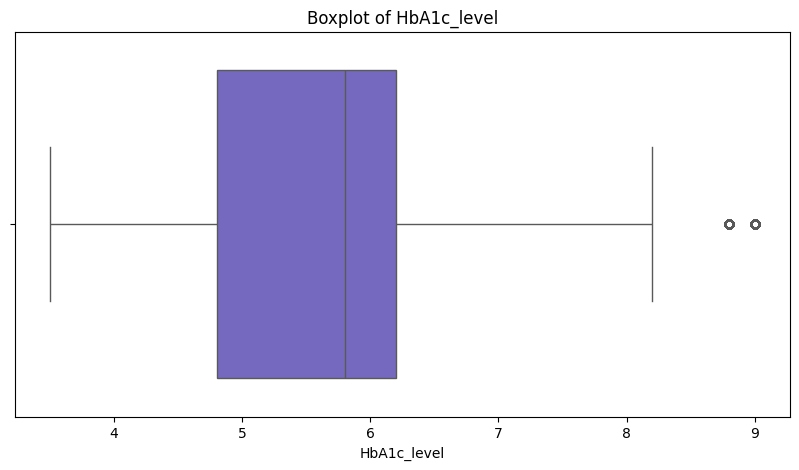

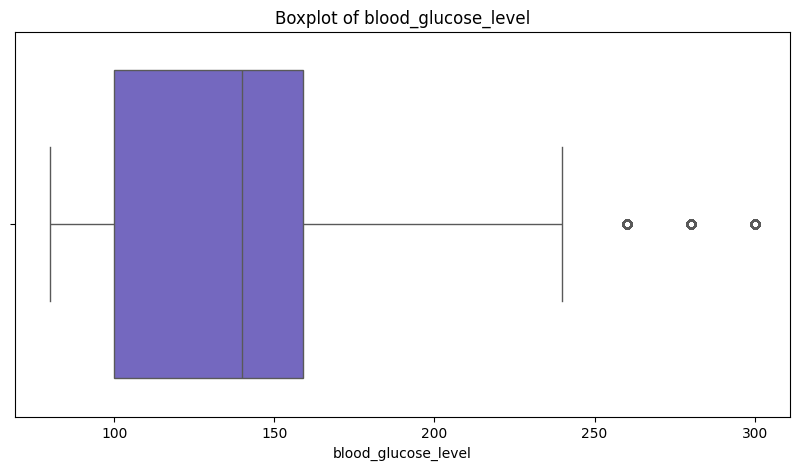

In [14]:
for num in fitur_numerik:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=num, color='slateblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

### Multivariate Analysis

#### Membandingkan diabetes dengan gender

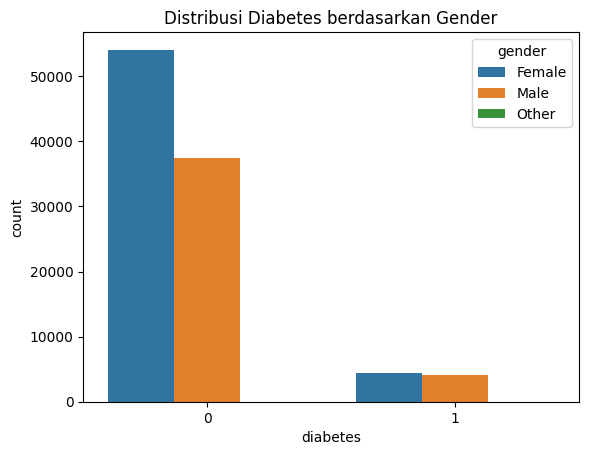

In [15]:
sns.countplot(data=df, x='diabetes', hue='gender')
plt.title('Distribusi Diabetes berdasarkan Gender')
plt.show()

Dari Plot diatas didapat informasi:
1. Jumlah perempuan tanpa diabetes jauh lebih banyak daripada laki-laki tanpa diabetes.
2. Jumlah perempuan dengan diabetes hampir sama dengan jumlah laki-laki dengan diabetes.

#### Membandingkan diabetes dengan usia

C:\Users\hilmi\AppData\Local\Temp\ipykernel_17976\1815162829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_strip, x="age", y="diabetes", jitter=0.3, alpha=0.5, palette="Set2")


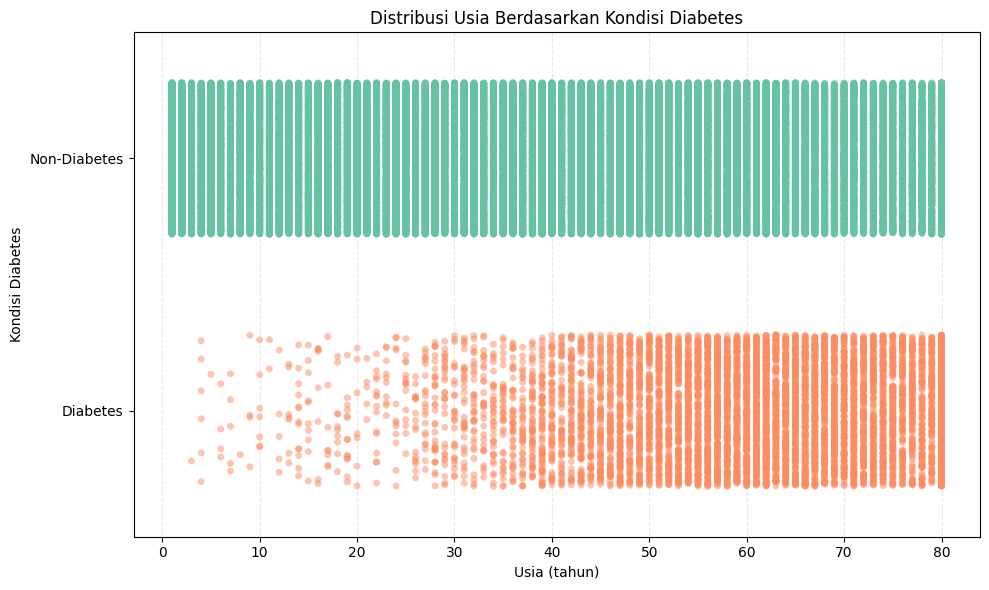

In [16]:
plt.figure(figsize=(10, 6))
df_strip = df.copy()
df_strip['diabetes']=df['diabetes'].apply(lambda x: 'Diabetes' if x==1 else 'Non-Diabetes')
sns.stripplot(data=df_strip, x="age", y="diabetes", jitter=0.3, alpha=0.5, palette="Set2")

plt.title("Distribusi Usia Berdasarkan Kondisi Diabetes")
plt.xlabel("Usia (tahun)")
plt.ylabel("Kondisi Diabetes")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Dari gambar diatas:
1. Seluruh responden non diabates direntang 1-80
2. Seluruh responden diabetes mulai banyak frekuensinya pada umur 20-80. Dengan beberapa outlier di rentang 1-29


#### Membandingkan diabetes dengan tingkat kadar gula saat ini

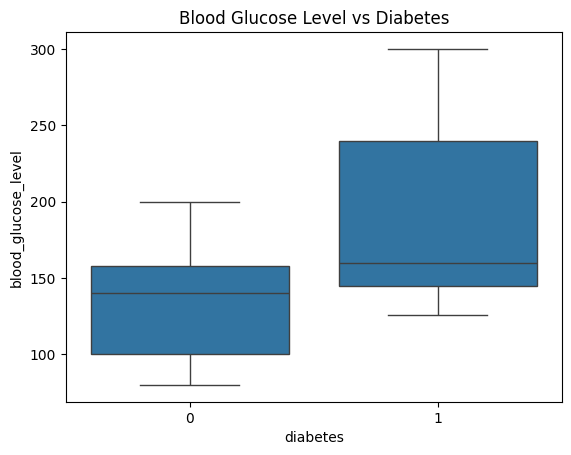

In [17]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

Dari boxplot diatas:
1. Pasien dengan diabetes memiliki median level glukosa darah yang lebih tinggi dibandingkan pasien tanpa diabetes.
2. Distribusi glukosa pada penderita diabetes lebih melebar dan mencakup nilai yang lebih tinggi hingga 300.
3. Ppasien tanpa diabetes memiliki glukosa darah yang lebih terkonsentrasi di bawah 200.

#### Membandingkan diabetes dengan HbA1c_level (tingkat gula dalam darah 2-3 bulan terakhir)

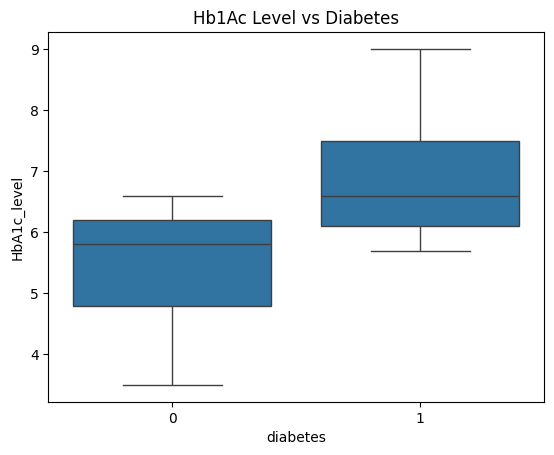

In [18]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('Hb1Ac Level vs Diabetes')
plt.show()

Dari boxplot diatas:
1. Penderita diabetes memiliki HbA1c yang lebih tinggi dibandingkan non-diabetes.

2. Median HbA1c penderita diabetes sekitar 6.5–7.5, sedangkan non-diabetesi sekitar 5.5–6.

3. Hampir seluruh penderita diabetes memiliki HbA1c di atas 6

#### Membuat Correlation Matrix

In [19]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


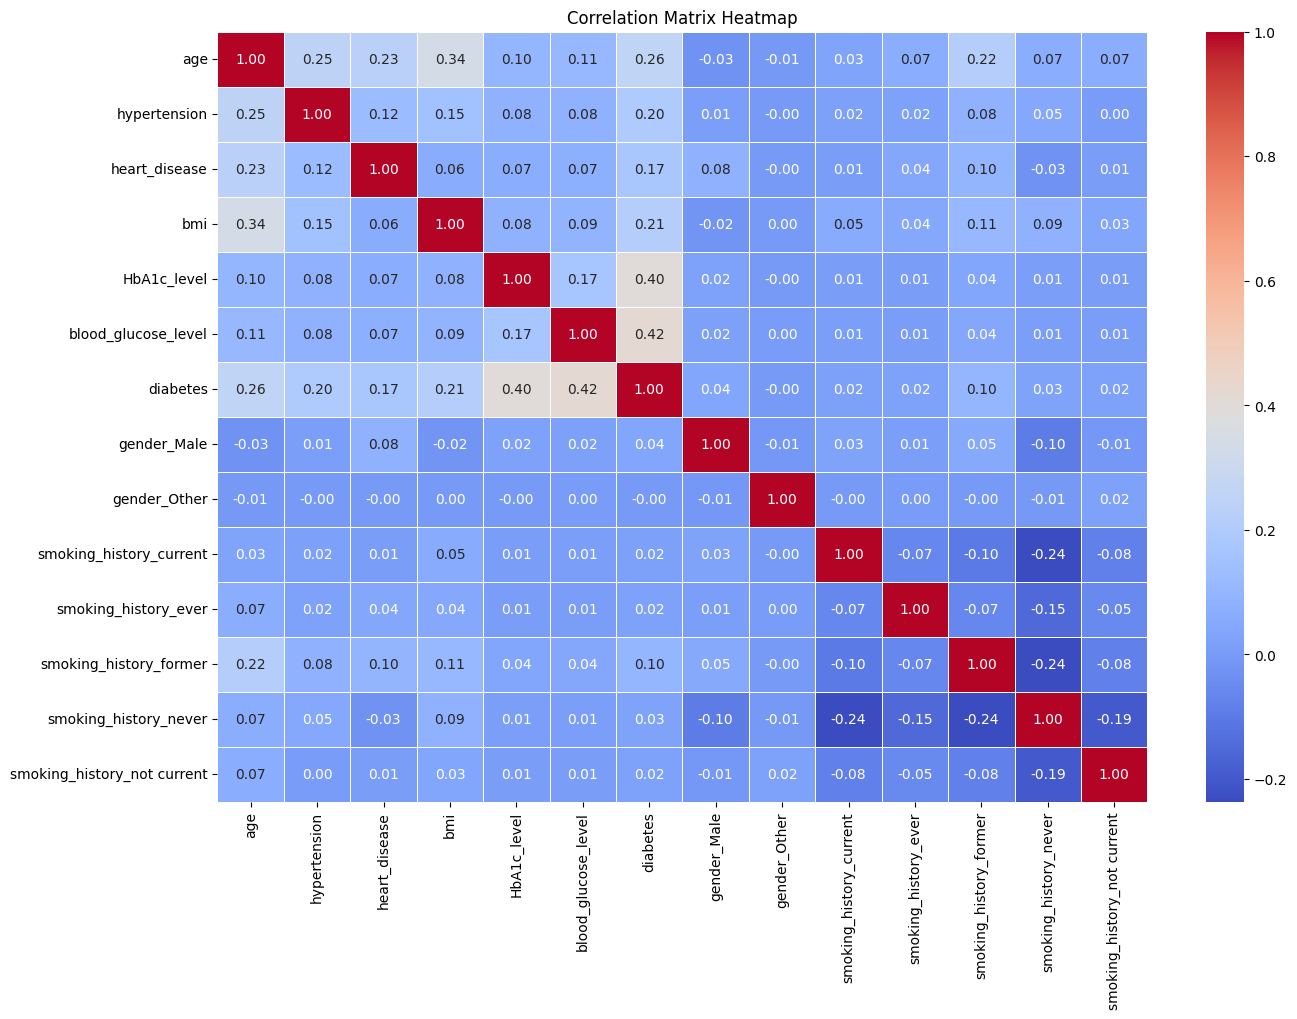

In [20]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Graph I: Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Graph II: Correlation with 'diabetes' (target variable)
corr = df_encoded.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)


Dari Correlation Matrix diatas:
1. Diabetes memiliki korelasi tinggi dengan blood_glucose_level dan HbA1c_level. Hal ini menunjukkan 2 variabel ini merupakan prediktor yang kuat
2. age, bmi, hypertension dan heart_disease memiliki korelasi positif yang lumayan. Hal ini menandakan bahwa usia yang lebih tua, indeks masa tubuh yang tinggi, hipertensi dan penyakit jantung berkontribusi pada diabetes.


# **5. Data Preprocessing**

## Data Cleaning

Menangani Data Duplikat

In [21]:
df.duplicated().sum()

3914

In [22]:
df_clean=df.drop_duplicates()

Terdapat 3914 data duplikat, kemudian kita menghapusnya dengan .drop_duplicates()

Menangani Missing Value

In [23]:
df_clean.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Tidak terdapat missing value pada dataset kita

#### Drop kolom smoking_history
Kolom ini akan di drop karena menurut correlation matrix, kolom ini tidak berkaitan dengan kolom lain.

In [24]:
df_clean.drop('smoking_history', axis=1, inplace=True)  # kalau mau modify langsung tanpa reassignment

C:\Users\hilmi\AppData\Local\Temp\ipykernel_17976\962474191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('smoking_history', axis=1, inplace=True)  # kalau mau modify langsung tanpa reassignment


#### Drop baris dengan nilai Other di kolom gender
Umumnya gender yang dipakai hanya 2, ini memudahkan analisis maupun model.

In [25]:
df_clean = df_clean[df_clean['gender'] != 'Other'].copy()

####  Deteksi dan penanganan outlier

In [26]:


threshold = 3.5
z_scores = np.abs((df_clean[fitur_numerik] - df_clean[fitur_numerik].mean()) / 
                  df_clean[fitur_numerik].std())

df_clean = df_clean[(z_scores < threshold).all(axis=1)]

print(f"Data sebelum: {len(df)}, sesudah: {len(df_clean)} -> dibuang {len(df)-len(df_clean)} baris")

Data sebelum: 100000, sesudah: 94771 -> dibuang 5229 baris


In [27]:
df_clean.shape

(94771, 8)

## One Hot Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(
    sparse_output=False, 
    drop='first',
    handle_unknown='ignore'
)
encoded = encoder.fit_transform(df_clean[['gender', 'heart_disease', 'hypertension']])
df_clean[encoder.get_feature_names_out()] = encoded
df_clean = df_clean.drop('gender', axis=1)


In [29]:
df_clean.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,heart_disease_1,hypertension_1
0,80,0,1,25.19,6.6,140,0,0.0,1.0,0.0
1,54,0,0,27.32,6.6,80,0,0.0,0.0,0.0
2,28,0,0,27.32,5.7,158,0,1.0,0.0,0.0
3,36,0,0,23.45,5.0,155,0,0.0,0.0,0.0
4,76,1,1,20.14,4.8,155,0,1.0,1.0,1.0


## Split Train Test

Selanjutnya, karena target kita adalah variabel **diabetes** maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [30]:
X = df_clean.drop('diabetes',axis=1)
y = df_clean['diabetes']
# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=22)

Lalu, kita membagi data menjadi 2, yaitu
* Data training sebesar 80% untuk melatih model
* Data testing sebesar 20% untuk menguji model

In [31]:
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (75816, 9)
Ukuran X_test:  (18955, 9)
Ukuran y_train:  (75816,)
Ukuran y_test:  (18955,)


## Standardisasi

In [32]:
# scaling untuk data training
fitur_numerik=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
scaler.fit(X_train[fitur_numerik])
X_train[fitur_numerik] = scaler.transform(X_train.loc[:, fitur_numerik])
X_train[fitur_numerik].head()

,age,bmi,HbA1c_level,blood_glucose_level
51651,0.949583,-0.331210,1.013353,-0.287371
88385,-0.209342,-0.641561,-1.429129,-1.346947
80870,1.484471,-0.866406,1.201236,0.565459
51899,1.618193,0.034560,-0.489713,-0.287371
21371,-1.145397,2.739041,1.013353,0.074436


Scaler di fit menggunakan data train. data train di standardisasi menggunakan scaler yang di fit tadi

In [33]:
X_test[fitur_numerik] = scaler.transform(X_test.loc[:, fitur_numerik])
X_test[fitur_numerik].head()

,age,bmi,HbA1c_level,blood_glucose_level
45963,1.038731,0.170734,-0.489713,-1.346947
74810,-1.011675,3.030391,-0.489713,-1.217730
59716,1.484471,0.984612,0.919412,0.203653
82342,-0.877953,0.034560,0.261820,-0.959297
95187,1.662767,0.034560,-1.898838,0.203653


Data testing di transform menggunakan scaler yang di fit menggunakan data training agar menghindari data leakage

In [ ]:
# Gabung lagi jadi DataFrame + tambah kolom target
train_df = pd.DataFrame(X_train, columns=fitur_numerik + list(encoder.get_feature_names_out()) )
train_df['diabetes'] = y_train.values

test_df = pd.DataFrame(X_test, columns=fitur_numerik + list(encoder.get_feature_names_out()))
test_df['diabetes'] = y_test.values

# Buat folder & simpan hasil
output_dir = "diabetes_prediction_dataset_preprocessing"
os.makedirs(output_dir, exist_ok=True)

train_path = os.path.join(output_dir, "train_processed.csv")
test_path = os.path.join(output_dir, "test_processed.csv")

print(f"\n Preprocessing selesai")
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)



 Preprocessing selesai
